In [2]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
#warnings.filterwarnings('ignore')

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [3]:
df = pd.read_csv('adult.csv')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:

df.columns = ['age', 'workclass','fnlwgt','education','education-num','maritalstatus','occupation','relationship','race',
              'sex','capitalgain','capitalloss','hours_per_week','country','income']
df.head(10)

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hours_per_week,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
df.shape

(32560, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education-num     32560 non-null int64
maritalstatus     32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capitalgain       32560 non-null int64
capitalloss       32560 non-null int64
hours_per_week    32560 non-null int64
country           32560 non-null object
income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
maritalstatus     0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hours_per_week    0
country           0
income            0
dtype: int64

In [9]:
# Lets check columns based on their data type
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['age', 'fnlwgt', 'education-num', 'capitalgain', 'capitalloss',
        'hours_per_week'],
       dtype='object'),
 dtype('O'): Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
        'race', 'sex', 'country', 'income'],
       dtype='object')}

In [10]:
# Check for unique value in object types
print(df['workclass'].unique(),"\n")
print(df['education'].unique(),"\n")
print(df['maritalstatus'].unique(),"\n")
print(df['occupation'].unique(),"\n")
print(df['relationship'].unique(),"\n")
print(df['race'].unique(),"\n")
print(df['sex'].unique(),"\n")
print(df['country'].unique(),"\n")
print(df['income'].unique(),"\n")

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 

[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv'] 

[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

[' Male' ' Female'] 

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Cana

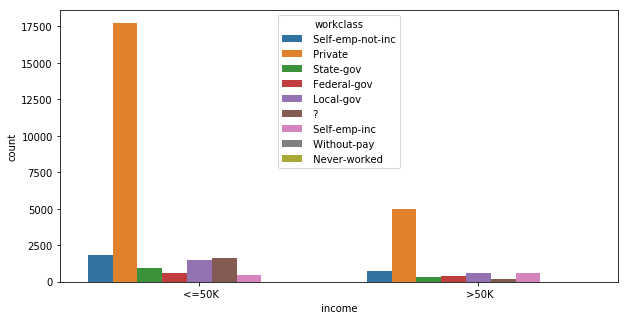

In [11]:
# Lets plot
plt.figure(figsize=(10,5))
sns.countplot(x='income',hue='workclass',data=df)

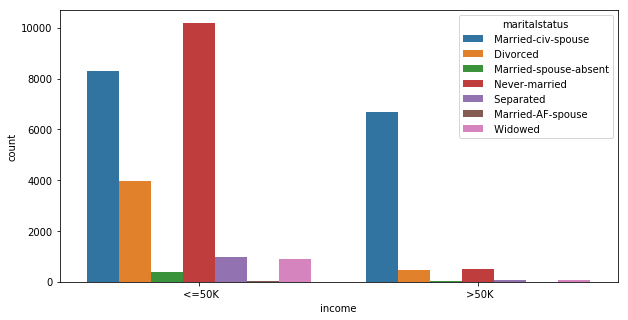

In [12]:

plt.figure(figsize=(10,5))
sns.countplot(x='income',hue='maritalstatus',data=df)

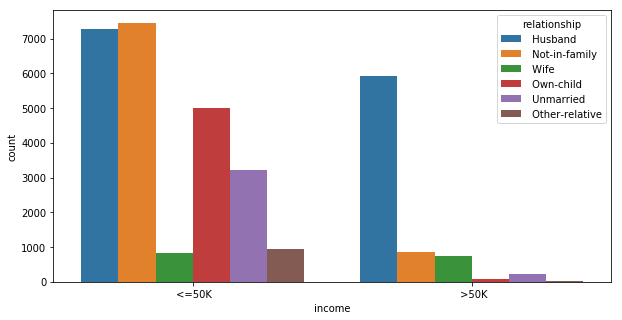

In [13]:

plt.figure(figsize=(10,5))
sns.countplot(x='income',hue='relationship',data=df)

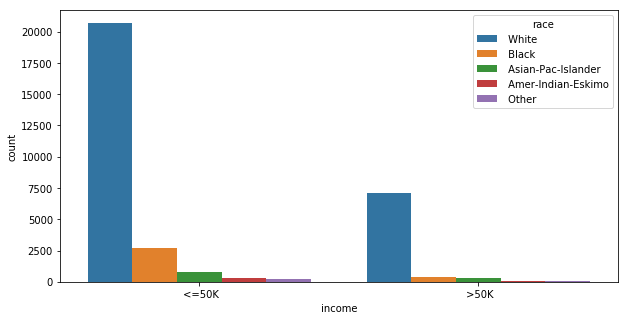

In [14]:

plt.figure(figsize=(10,5))
sns.countplot(x='income',hue='race',data=df)

In [15]:
# Taking backup of dataset
df1 = df.copy() 
df1.head()

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hours_per_week,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [16]:
# Convert object dataset to numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['maritalstatus'] = le.fit_transform(df['maritalstatus'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['country'] = le.fit_transform(df['country'])
df['income'] = le.fit_transform(df['income'])

In [17]:
df.head()

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hours_per_week,country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [18]:
df.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education-num     int64
maritalstatus     int32
occupation        int32
relationship      int32
race              int32
sex               int32
capitalgain       int64
capitalloss       int64
hours_per_week    int64
country           int32
income            int32
dtype: object

In [21]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df=df.loc[(z_score<3).all(axis=1)]
print(df.shape)

(32560, 15)
(27417, 15)


In [22]:
df.corr()

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hours_per_week,country,income
age,1.000000,0.005550,-0.077696,-0.003468,0.044081,-0.285866,-0.015548,-0.270293,0.019111,0.088655,0.132075,0.023576,0.091284,0.031861,0.240812
workclass,0.005550,1.000000,-0.021209,0.021548,0.049536,-0.061751,0.249485,-0.089897,0.063215,0.092388,0.025033,-0.007678,0.126808,-0.002430,0.040617
fnlwgt,-0.077696,-0.021209,1.000000,-0.021115,-0.040499,0.029745,-0.003014,0.016309,-0.104179,0.022103,-0.003383,0.003242,-0.019049,-0.101129,-0.011482
education,-0.003468,0.021548,-0.021115,1.000000,0.347380,-0.036817,-0.023478,-0.010712,0.026797,-0.030860,0.026506,-0.000368,0.059737,0.085089,0.071124
education-num,0.044081,0.049536,-0.040499,0.347380,1.000000,-0.058411,0.111075,-0.094415,0.085832,0.003929,0.157635,0.007583,0.157519,0.139701,0.320437
maritalstatus,-0.285866,-0.061751,0.029745,-0.036817,-0.058411,1.000000,-0.007683,0.183138,-0.083932,-0.125693,-0.069270,-0.016520,-0.198743,-0.034275,-0.193361
occupation,-0.015548,0.249485,-0.003014,-0.023478,0.111075,-0.007683,1.000000,-0.077594,0.011857,0.081592,0.023061,-0.004016,0.069319,0.010534,0.070193
relationship,-0.270293,-0.089897,0.016309,-0.010712,-0.094415,0.183138,-0.077594,1.000000,-0.148296,-0.575976,-0.091272,0.030393,-0.262685,-0.020746,-0.247992
race,0.019111,0.063215,-0.104179,0.026797,0.085832,-0.083932,0.011857,-0.148296,1.000000,0.126540,0.031561,-0.000123,0.059800,0.059128,0.094250
sex,0.088655,0.092388,0.022103,-0.030860,0.003929,-0.125693,0.081592,-0.575976,0.126540,1.000000,0.070941,-0.027519,0.236440,-0.004339,0.211917


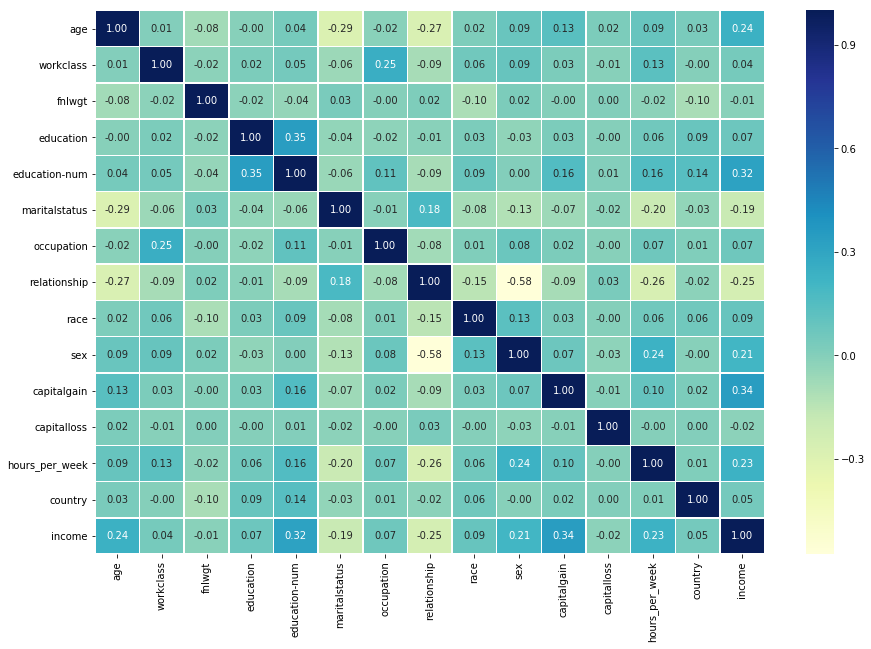

In [23]:
# Let's plot the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");


In [25]:
# Lets start modelling
# Split data into X and y
X = df.drop("income", axis=1)
y = df["income"]

In [26]:
y.head()

0    0
1    0
2    0
4    0
5    0
Name: income, dtype: int32

In [32]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state = 42,
                                                    shuffle = True,
                                                    stratify = y)

We're going to try 3 different machine learning models:

* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

In [35]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
   
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [36]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8037928519328957,
 'KNN': 0.7926088013615366,
 'Random Forest': 0.8589837101872113}

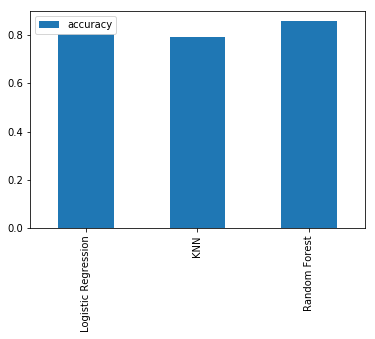

In [37]:
# Compare models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### Hyperparameter tuning

In [38]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [39]:
train_scores

[1.0,
 0.8678547235683394,
 0.8621749778542025,
 0.8358084518784847,
 0.8335678182481372,
 0.8220520035433276,
 0.8216351414725652,
 0.8174665207649419,
 0.816945443176489,
 0.8142879474753791,
 0.8137668698869261,
 0.8127247147100203,
 0.8133500078161638,
 0.8113178052211975,
 0.8124120681569486,
 0.811057266426971,
 0.8120473138450315,
 0.8104840810796727,
 0.8109009431504351,
 0.8103798655619822]

In [40]:
test_scores

[0.7287867736445417,
 0.799659615852176,
 0.7699975686846584,
 0.8039144176999757,
 0.7926088013615366,
 0.8065888645757354,
 0.799781181619256,
 0.8069535618769754,
 0.8026987600291758,
 0.8084123510819353,
 0.8057379042061755,
 0.8103574033552152,
 0.8098711402868952,
 0.8109652321906151,
 0.812180889861415,
 0.8116946267930951,
 0.8110867979576951,
 0.8112083637247751,
 0.8107221006564551,
 0.8107221006564551]

Maximum KNN score on the test data: 81.22%


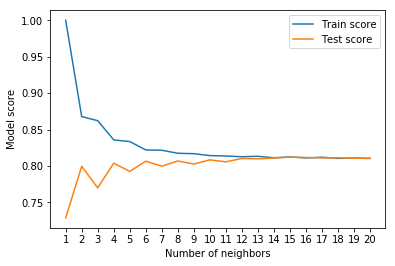

In [41]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV
We're going to tune:

* LogisticRegression()
* RandomForestClassifier()

In [42]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [43]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [44]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [45]:
rs_log_reg.score(X_test, y_test)

0.8062241672744955

In [46]:
# Tune RandomForestClassifier
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [47]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [48]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8695599319231704

### Hyperparamter Tuning with GridSearchCV
we'll try and improve LogisticRegression and RandomForestClassifier again using GridSearchCV

In [52]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 6, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   30.5s finished


In [53]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.02592943797404667, 'solver': 'liblinear'}

In [54]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8091417456844152

In [56]:
# Different hyperparameters for our RandomForestClassifier model
rf_gridcv = {"n_estimators": np.arange(500, 600, 10),
           "max_depth": [None],
           "min_samples_split": np.arange(10, 20, 2),
           "min_samples_leaf": np.arange(1, 10, 1)}

# Setup grid hyperparameter search for RandomForestClassifier
gs_rf_grid = GridSearchCV(RandomForestClassifier() ,
                          param_grid=rf_gridcv,
                          cv = 3, 
                          n_jobs = -1, 
                          verbose = True)

# Fit grid hyperparameter search model
gs_rf_grid.fit(X_train, y_train);


Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 56.3min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 60.6min finished


In [57]:
gs_rf_grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 9,
 'min_samples_split': 18,
 'n_estimators': 530}

In [58]:
# Evaluate the grid search RandomForest model
gs_rf_grid.score(X_test, y_test)

0.8667639192803307

Evaluting our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
* cross-validation 


In [59]:
y_preds = gs_rf_grid.predict(X_test)

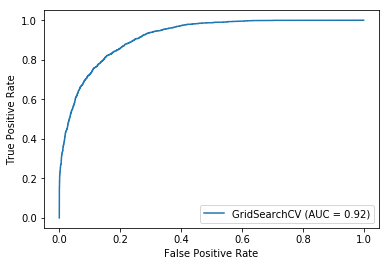

In [60]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_rf_grid, X_test, y_test)

In [62]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[6085  299]
 [ 797 1045]]


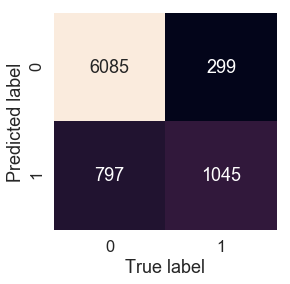

In [64]:

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test, y_preds)

In [65]:
# Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6384
           1       0.78      0.57      0.66      1842

    accuracy                           0.87      8226
   macro avg       0.83      0.76      0.79      8226
weighted avg       0.86      0.87      0.86      8226



#### Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [66]:
# Check best hyperparameters
gs_rf_grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 9,
 'min_samples_split': 18,
 'n_estimators': 530}

In [67]:
# Create a new classifier with best parameters
clf = RandomForestClassifier( max_depth= None,
                              min_samples_leaf= 9,
                              min_samples_split= 18,
                              n_estimators= 530)

In [68]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.85393873, 0.86177972, 0.85956593, 0.86540215, 0.86248404])

In [69]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8606341156865336

In [70]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.7574290266104337

In [71]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.5549055056027651

In [72]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.6391093607063766

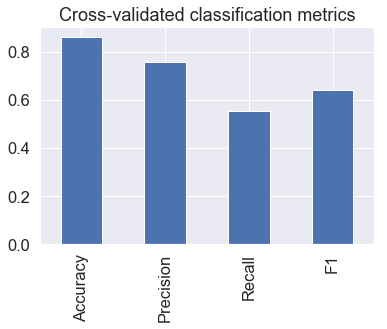

In [73]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

Note:- Among the three models gs_rf_grid gives the Highest accuracy(86%)

In [74]:
# Lets Save the model as pickle in a file
import pickle
filename = 'census_income.pkl'
pickle.dump(gs_rf_grid, open(filename, 'wb'))